# CAPSTONE PROJECT IN Predicting Credit Card Customer Segmentation

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# DATA 

In [2]:
df=pd.read_csv('BankChurners.csv')

In [3]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [4]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [5]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [6]:
df.drop(columns=['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],inplace = True, axis = 1)

In [7]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710


In [8]:
df.rename(columns = {'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':'Churn_Prob',
                    'Months_on_book':'Months','Total_Relationship_Count':'Relations','Dependent_count':'Dependents',
                    'Customer_Age':'Age', 'Education_Level':'Education', 'Months_Inactive_12_mon':'Inactive_Months',
                    'Contacts_Count_12_mon':'Contacts_Count', 'Total_Revolving_Bal':'Revolving_balance',
                    'Avg_Open_To_Buy':'Open_Buy_Ratio','Total_Amt_Chng_Q4_Q1':'Q4_Q1_Amt_Change','Total_Trans_Amt':'Trans_Amount',
                    'Total_Trans_Ct':'Trans_Count','Total_Ct_Chng_Q4_Q1':'Q4_Q1_Ct_Change','Avg_Utilization_Ratio':'Uti_Ratio'},inplace = True)

In [9]:
df

,Attrition_Flag,Age,Gender,Dependents,Education,Marital_Status,Income_Category,Card_Category,Months,Relations,...,Contacts_Count,Credit_Limit,Revolving_balance,Open_Buy_Ratio,Q4_Q1_Amt_Change,Trans_Amount,Trans_Count,Q4_Q1_Ct_Change,Uti_Ratio,Churn_Prob
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710


In [10]:
df.columns

Index(['Attrition_Flag', 'Age', 'Gender', 'Dependents', 'Education',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months',
       'Relations', 'Inactive_Months', 'Contacts_Count', 'Credit_Limit',
       'Revolving_balance', 'Open_Buy_Ratio', 'Q4_Q1_Amt_Change',
       'Trans_Amount', 'Trans_Count', 'Q4_Q1_Ct_Change', 'Uti_Ratio',
       'Churn_Prob'],
      dtype='object')

In [11]:
df.head()

,Attrition_Flag,Age,Gender,Dependents,Education,Marital_Status,Income_Category,Card_Category,Months,Relations,...,Contacts_Count,Credit_Limit,Revolving_balance,Open_Buy_Ratio,Q4_Q1_Amt_Change,Trans_Amount,Trans_Count,Q4_Q1_Ct_Change,Uti_Ratio,Churn_Prob
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022



# df['Attrition_Flag']

In [12]:
df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [13]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [14]:
data = df[df['Attrition_Flag'] == 'Attrited Customer']

In [15]:
data

,Attrition_Flag,Age,Gender,Dependents,Education,Marital_Status,Income_Category,Card_Category,Months,Relations,...,Contacts_Count,Credit_Limit,Revolving_balance,Open_Buy_Ratio,Q4_Q1_Amt_Change,Trans_Amount,Trans_Count,Q4_Q1_Ct_Change,Uti_Ratio,Churn_Prob
21,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,...,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000,0.99616
39,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,5,...,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077,0.99780
51,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,2,...,1,1438.3,808,630.3,0.997,705,19,0.900,0.562,0.99028
54,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,1,...,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000,0.99671
61,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,2,...,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000,0.99823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,47,4,...,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172,0.99691
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.99527
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.99788
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.99671


[Text(0, 0, '8500'), Text(0, 0, '1627')]

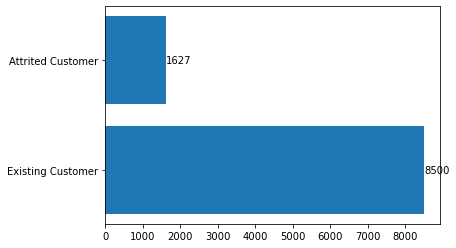

In [16]:
x = ['Existing Customer','Attrited Customer']
y = [df['Attrition_Flag'].value_counts()[0],df['Attrition_Flag'].value_counts()[1]]
fig, ax = plt.subplots()
bars = ax.barh(x, y)
ax.bar_label(bars)

In [17]:
df.isnull().sum()

Attrition_Flag       0
Age                  0
Gender               0
Dependents           0
Education            0
Marital_Status       0
Income_Category      0
Card_Category        0
Months               0
Relations            0
Inactive_Months      0
Contacts_Count       0
Credit_Limit         0
Revolving_balance    0
Open_Buy_Ratio       0
Q4_Q1_Amt_Change     0
Trans_Amount         0
Trans_Count          0
Q4_Q1_Ct_Change      0
Uti_Ratio            0
Churn_Prob           0
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [19]:
df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [20]:
df['Attrition_Flag'] = encoder.fit_transform(df['Attrition_Flag'])
df['Attrition_Flag'].unique()

array([1, 0])

# df['Gender']

In [21]:
df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [22]:
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Gender'].unique()

array([1, 0])

# df['Education'].unique()

In [23]:
df['Education'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

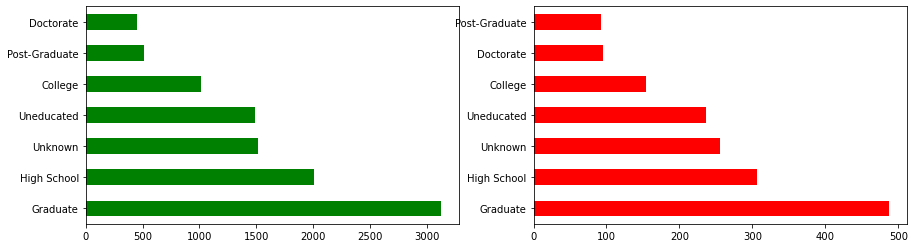

In [24]:
plt.subplot(1,2,1)
df['Education'].value_counts().plot(kind = 'barh', color = 'green')

plt.subplot(1,2,2)
data['Education'].value_counts().plot(kind = 'barh', color = 'red')

plt.subplots_adjust(left = 0.5, right= 2.4)

In [25]:
df['Education'] = encoder.fit_transform(df['Education'])
df['Education'].unique()

array([3, 2, 5, 6, 0, 4, 1])

# df['Age']

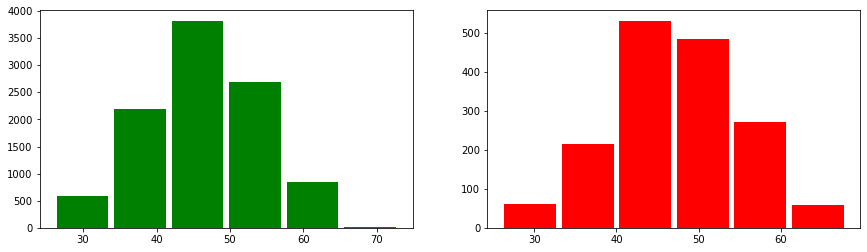

In [26]:
plt.subplot(1,2,1)
plt.hist(df['Age'], rwidth = 0.9, color = 'g', bins = 6)

plt.subplot(1,2,2)
plt.hist(data['Age'], rwidth = 0.9, color = 'r', bins = 6)

plt.subplots_adjust(left = 0.5, right = 2.4)

In [27]:
df.head()

,Attrition_Flag,Age,Gender,Dependents,Education,Marital_Status,Income_Category,Card_Category,Months,Relations,...,Contacts_Count,Credit_Limit,Revolving_balance,Open_Buy_Ratio,Q4_Q1_Amt_Change,Trans_Amount,Trans_Count,Q4_Q1_Ct_Change,Uti_Ratio,Churn_Prob
0,1,45,1,3,3,Married,$60K - $80K,Blue,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093
1,1,49,0,5,2,Single,Less than $40K,Blue,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057
2,1,51,1,3,2,Married,$80K - $120K,Blue,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021
3,1,40,0,4,3,Unknown,Less than $40K,Blue,34,3,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134
4,1,40,1,3,5,Married,$60K - $80K,Blue,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022


# df['Marital_Status']

In [28]:
df['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [29]:
df['Marital_Status'] = encoder.fit_transform(df['Marital_Status'])
df['Marital_Status'].unique()

array([1, 2, 3, 0])

[Text(0, 0, '749'), Text(0, 0, '3943'), Text(0, 0, '4687'), Text(0, 0, '748')]

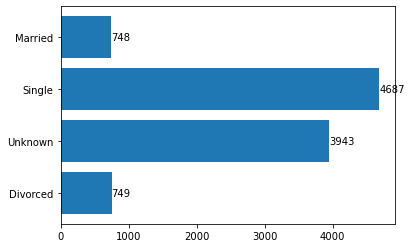

In [30]:
x = ['Divorced','Unknown','Single','Married']
y = [df['Marital_Status'].value_counts()[3],df['Marital_Status'].value_counts()[2],df['Marital_Status'].value_counts()[1],df['Marital_Status'].value_counts()[0]]
fig, ax = plt.subplots()
bars = ax.barh(x, y)
ax.bar_label(bars)

# df['Income_Category']

In [31]:
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

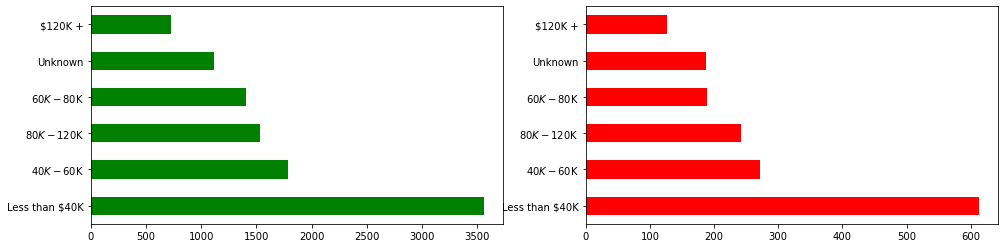

In [32]:
plt.subplot(1,2,1)
df['Income_Category'].value_counts().plot(kind = 'barh', color = 'green')

plt.subplot(1,2,2)
data['Income_Category'].value_counts().plot(kind = 'barh', color = 'red')

plt.subplots_adjust(left = 0.2, right = 2.3)

In [33]:
df['Income_Category'] = encoder.fit_transform(df['Income_Category'])
df['Income_Category'].unique()

array([2, 4, 3, 1, 0, 5])

# Card Category

In [34]:
df['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

[Text(0, 0, '20'), Text(0, 0, '116'), Text(0, 0, '555'), Text(0, 0, '9436')]

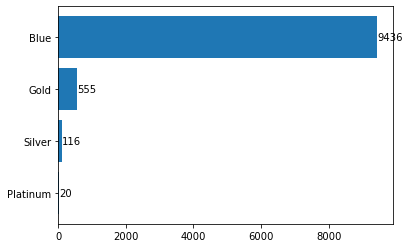

In [35]:
x = ['Platinum','Silver','Gold','Blue']
y = [df['Card_Category'].value_counts()[3],df['Card_Category'].value_counts()[2],df['Card_Category'].value_counts()[1],df['Card_Category'].value_counts()[0]]
fig, ax = plt.subplots()
bars = ax.barh(x, y)
ax.bar_label(bars)

In [36]:
df['Card_Category'] = encoder.fit_transform(df['Card_Category'])
df['Card_Category'].unique()

array([0, 1, 3, 2])

In [37]:
df.head()

,Attrition_Flag,Age,Gender,Dependents,Education,Marital_Status,Income_Category,Card_Category,Months,Relations,...,Contacts_Count,Credit_Limit,Revolving_balance,Open_Buy_Ratio,Q4_Q1_Amt_Change,Trans_Amount,Trans_Count,Q4_Q1_Ct_Change,Uti_Ratio,Churn_Prob
0,1,45,1,3,3,1,2,0,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093
1,1,49,0,5,2,2,4,0,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057
2,1,51,1,3,2,1,3,0,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021
3,1,40,0,4,3,3,4,0,34,3,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134
4,1,40,1,3,5,1,2,0,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022


# df['Dependents']

(array([ 904., 1838., 2655., 2732., 1998.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

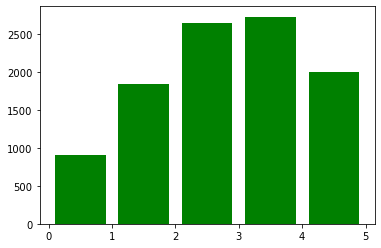

In [38]:
plt.hist(df['Dependents'], bins= 5, rwidth = 0.8, color='g')

# df['Months']

(array([ 466., 1754., 4750., 2340.,  817.]),
 array([13. , 21.6, 30.2, 38.8, 47.4, 56. ]),
 <BarContainer object of 5 artists>)

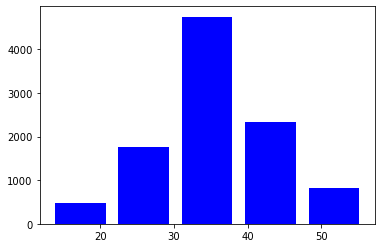

In [43]:
plt.hist(df['Months'], bins = 5, color = 'b', rwidth = .8)

# df['Gender']

In [44]:
df['Gender'].value_counts()

0    5358
1    4769
Name: Gender, dtype: int64

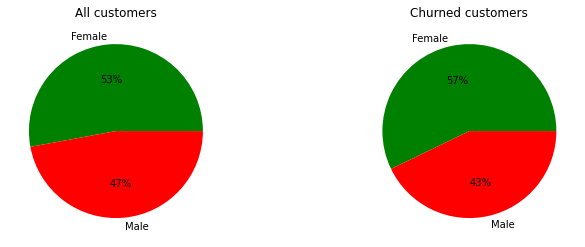

In [45]:
plt.subplot(1,2,1)
plt.pie(df['Gender'].value_counts(),labels= ['Female','Male'] ,autopct='%.0f%%', colors= 'gr')
plt.title("All customers")

plt.subplot(1,2,2)
plt.pie(data['Gender'].value_counts(),labels = ['Female','Male'], autopct='%.0f%%', colors= 'gr')
plt.title("Churned customers")

plt.subplots_adjust(left = 0.5, right = 2)

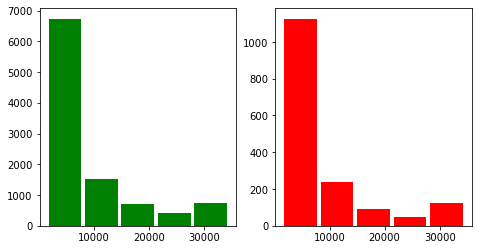

In [46]:
plt.subplot(1,2,1)
plt.hist(df['Credit_Limit'], rwidth = 0.9, color = 'g', bins = 5)

plt.subplot(1,2,2)
plt.hist(data['Credit_Limit'], rwidth = 0.9, color = 'r', bins = 5)

plt.subplots_adjust(left = 1, right = 2)

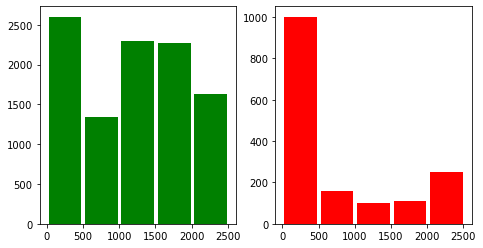

In [47]:
plt.subplot(1,2,1)
plt.hist(df['Revolving_balance'], rwidth = 0.9, color = 'g', bins = 5)

plt.subplot(1,2,2)
plt.hist(data['Revolving_balance'], rwidth = 0.9, color = 'r', bins = 5)

plt.subplots_adjust(left = 1, right = 2)

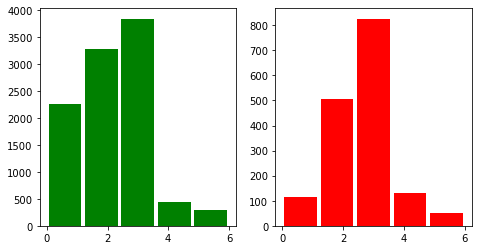

In [48]:
plt.subplot(1,2,1)
plt.hist(df['Inactive_Months'], rwidth = 0.9, color = 'g', bins = 5)

plt.subplot(1,2,2)
plt.hist(data['Inactive_Months'], rwidth = 0.9, color = 'r', bins = 5)

plt.subplots_adjust(left = 1, right = 2)

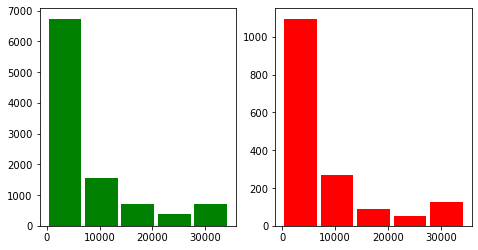

In [49]:
plt.subplot(1,2,1)
plt.hist(df['Open_Buy_Ratio'], rwidth = 0.9, color = 'g', bins = 5)

plt.subplot(1,2,2)
plt.hist(data['Open_Buy_Ratio'], rwidth = 0.9, color = 'r', bins = 5)

plt.subplots_adjust(left = 1, right = 2)

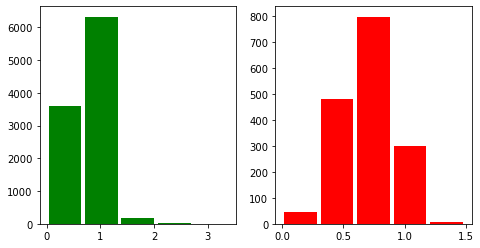

In [50]:
plt.subplot(1,2,1)
plt.hist(df['Q4_Q1_Amt_Change'], rwidth = 0.9, color = 'g', bins = 5)

plt.subplot(1,2,2)
plt.hist(data['Q4_Q1_Amt_Change'], rwidth = 0.9, color = 'r', bins = 5)

plt.subplots_adjust(left = 1, right = 2)

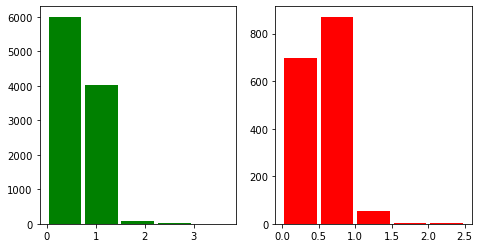

In [51]:
plt.subplot(1,2,1)
plt.hist(df['Q4_Q1_Ct_Change'], rwidth = 0.9, color = 'g', bins = 5)

plt.subplot(1,2,2)
plt.hist(data['Q4_Q1_Ct_Change'], rwidth = 0.9, color = 'r', bins = 5)

plt.subplots_adjust(left = 1, right = 2)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Attrition_Flag     10127 non-null  int32  
 1   Age                10127 non-null  int64  
 2   Gender             10127 non-null  int32  
 3   Dependents         10127 non-null  int64  
 4   Education          10127 non-null  int32  
 5   Marital_Status     10127 non-null  int32  
 6   Income_Category    10127 non-null  int32  
 7   Card_Category      10127 non-null  int32  
 8   Months             10127 non-null  int64  
 9   Relations          10127 non-null  int64  
 10  Inactive_Months    10127 non-null  int64  
 11  Contacts_Count     10127 non-null  int64  
 12  Credit_Limit       10127 non-null  float64
 13  Revolving_balance  10127 non-null  int64  
 14  Open_Buy_Ratio     10127 non-null  float64
 15  Q4_Q1_Amt_Change   10127 non-null  float64
 16  Trans_Amount       101

In [54]:
print(df.corr())

                   Attrition_Flag       Age    Gender  Dependents  Education  \
Attrition_Flag           1.000000 -0.018203  0.037272   -0.018991  -0.005551   
Age                     -0.018203  1.000000 -0.017312   -0.122254   0.004083   
Gender                   0.037272 -0.017312  1.000000    0.004563   0.000694   
Dependents              -0.018991 -0.122254  0.004563    1.000000   0.003788   
Education               -0.005551  0.004083  0.000694    0.003788   1.000000   
Marital_Status          -0.018597 -0.011265 -0.000007    0.000337   0.014720   
Income_Category         -0.017584 -0.013474 -0.539731   -0.035417  -0.010442   
Card_Category            0.006038 -0.020131  0.079203    0.021674  -0.007212   
Months                  -0.013687  0.788912 -0.006728   -0.103062  -0.004953   
Relations                0.150005 -0.010931  0.003157   -0.039076   0.009636   
Inactive_Months         -0.152449  0.054361 -0.011163   -0.010768  -0.008077   
Contacts_Count          -0.204491 -0.018

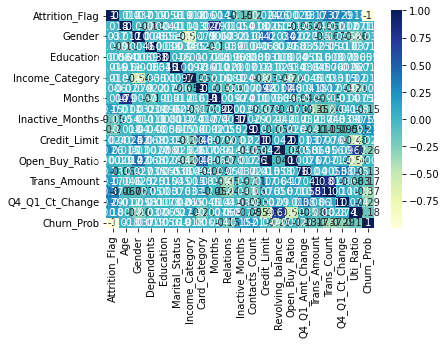

In [56]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

# smote

In [50]:
df['Attrition_Flag'].value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

In [51]:
from sklearn.utils import resample

In [52]:
yes=df[df['Attrition_Flag']==1]
no=df[df['Attrition_Flag']==0]


In [53]:
over=resample(no,replace=True,n_samples=len(yes),random_state=23)
dfsmote=pd.concat([yes,over])
dfsmote['Attrition_Flag'].value_counts()

1    8500
0    8500
Name: Attrition_Flag, dtype: int64

In [54]:
X = dfsmote.drop(columns = ['Attrition_Flag', 'Churn_Prob'], axis = 1)
y = dfsmote['Attrition_Flag']

In [55]:
X.shape

(17000, 19)

In [56]:
y.shape

(17000,)

Algorithms

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV


# GML

In [116]:
gml = LogisticRegression(multi_class= 'ovr',random_state=30)
gml.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr', random_state=30)

In [117]:
y_pred = gml.predict(X_test)

In [118]:
accuracy_score(y_test,y_pred)

0.8158823529411765

In [119]:
print(metrics.confusion_matrix(y_test, y_pred))

[[1430  322]
 [ 304 1344]]


In [120]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1752
           1       0.81      0.82      0.81      1648

    accuracy                           0.82      3400
   macro avg       0.82      0.82      0.82      3400
weighted avg       0.82      0.82      0.82      3400



# Logistic_Regression

In [64]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
p_x=lm.predict(X_train)
lm.score(X_test,y_test)
print(metrics.classification_report(y_test, y_pred, labels = [0,1,2]))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1752
           1       0.81      0.82      0.81      1648
           2       0.00      0.00      0.00         0

   micro avg       0.82      0.82      0.82      3400
   macro avg       0.54      0.54      0.54      3400
weighted avg       0.82      0.82      0.82      3400

[[1430  322]
 [ 304 1344]]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [66]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the logistic regression model:", accuracy)

Accuracy of the logistic regression model: 0.8158823529411765


# RandomForest

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [69]:
rf=RandomForestClassifier(random_state=30)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=30)

In [70]:
params={'criterion':['gini','entropy'],
    'n_estimators':[500,600,750,1000],
    'max_features':['sqrt',0.25],}

In [71]:
gd=GridSearchCV(rf,params,cv=10)

In [72]:
gd.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=30),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 0.25],
                         'n_estimators': [500, 600, 750, 1000]})

In [73]:
gd.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 750}

In [104]:
rf = RandomForestClassifier(criterion ='gini',max_features='sqrt', n_estimators=750)
model = rf.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred,y_test)

0.9882352941176471

# Decision_Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [76]:
params={'criterion':['gini','entropy'],'max_depth' :[5,8,12,20,50,75,100],'min_samples_split':[2,4,6]}


In [77]:
grid = GridSearchCV(dt,params,cv = 5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 8, 12, 20, 50, 75, 100],
                         'min_samples_split': [2, 4, 6]})

In [78]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 75, 'min_samples_split': 2}

In [ ]:
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth =  75,min_samples_split = 2)
model = dt.fit(X_train,y_train)

In [106]:
accuracy_score(model.predict(X_train),y_train)

1.0

In [107]:
y_pred = model.predict(X_test)

In [108]:
accuracy_score(y_pred,y_test)

0.9814705882352941

# Support vector machine


In [83]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [84]:
#svm_model = SVC(kernel='poly')
#svm_model.fit(X_train, y_train)
#y_pred = svm_model.predict(X_test)
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy of SVM model:", accuracy)

In [85]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM model:", accuracy)

Accuracy of SVM model: 0.8361764705882353


# Naive bayes


In [86]:
from  sklearn.naive_bayes import GaussianNB

In [87]:
gn=GaussianNB()

In [88]:
gn.fit(X_train,y_train)

GaussianNB()

In [89]:
y_pred_nb=gn.predict(X_test)

In [90]:
accuracy_score(y_test,y_pred_nb)

0.8002941176470588

# KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
knn = KNeighborsClassifier()

In [93]:
knn=KNeighborsClassifier(n_neighbors=1000,)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1000)

In [94]:
params={'n_neighbors':np.arange(1,40,1)}

In [95]:
grid=GridSearchCV(knn,params,cv=6)


In [96]:
grid.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(n_neighbors=1000),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [97]:
best_k = grid.best_params_['n_neighbors']
best_score = grid.best_score_

In [98]:
knn_final = KNeighborsClassifier(n_neighbors=best_k,algorithm='ball_tree')
knn_final.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1)

In [99]:
y_pred = knn_final.predict(X_test)

In [100]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the KNN model:", accuracy)

Accuracy of the KNN model: 0.95



# Gradient boosting

In [101]:
gb1 = GradientBoostingClassifier()
gb1.fit(X_train, y_train)

GradientBoostingClassifier()

In [102]:
y_pred = gb1.predict(X_test)

In [103]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Gradient Boosting classifier:", accuracy)

Accuracy of the Gradient Boosting classifier: 0.9638235294117647


# Accuracy